In [1]:
from effdet.config.model_config import efficientdet_model_param_dict
 
print(efficientdet_model_param_dict.keys())

dict_keys(['efficientdet_d0', 'efficientdet_d1', 'efficientdet_d2', 'efficientdet_d3', 'efficientdet_d4', 'efficientdet_d5', 'efficientdetv2_dt', 'efficientdetv2_ds', 'resdet50', 'cspresdet50', 'cspresdext50', 'cspresdext50pan', 'cspdarkdet53', 'cspdarkdet53m', 'mixdet_m', 'mixdet_l', 'mobiledetv2_110d', 'mobiledetv2_120d', 'mobiledetv3_large', 'efficientdet_q0', 'efficientdet_q1', 'efficientdet_q2', 'efficientdet_w0', 'efficientdet_es', 'efficientdet_em', 'efficientdet_lite0', 'tf_efficientdet_d0', 'tf_efficientdet_d1', 'tf_efficientdet_d2', 'tf_efficientdet_d3', 'tf_efficientdet_d4', 'tf_efficientdet_d5', 'tf_efficientdet_d6', 'tf_efficientdet_d7', 'tf_efficientdet_d7x', 'tf_efficientdet_d0_ap', 'tf_efficientdet_d1_ap', 'tf_efficientdet_d2_ap', 'tf_efficientdet_d3_ap', 'tf_efficientdet_d4_ap', 'tf_efficientdet_d5_ap', 'tf_efficientdet_lite0', 'tf_efficientdet_lite1', 'tf_efficientdet_lite2', 'tf_efficientdet_lite3', 'tf_efficientdet_lite3x', 'tf_efficientdet_lite4'])


In [2]:
# Compare efficientdet_d0 vs tf_efficientdet_d0
import pprint

print("=== efficientdet_d0 configuration ===")
pprint.pprint(efficientdet_model_param_dict['efficientdet_d0'])

print("\n=== tf_efficientdet_d0 configuration ===")
pprint.pprint(efficientdet_model_param_dict['tf_efficientdet_d0'])

print("\n=== Key Differences ===")
d0_config = efficientdet_model_param_dict['efficientdet_d0']
tf_d0_config = efficientdet_model_param_dict['tf_efficientdet_d0']

for key in set(d0_config.keys()) | set(tf_d0_config.keys()):
    if key not in d0_config:
        print(f"'{key}': Only in tf_efficientdet_d0 = {tf_d0_config[key]}")
    elif key not in tf_d0_config:
        print(f"'{key}': Only in efficientdet_d0 = {d0_config[key]}")
    elif d0_config[key] != tf_d0_config[key]:
        print(f"'{key}': efficientdet_d0={d0_config[key]} vs tf_efficientdet_d0={tf_d0_config[key]}")
    # If they're the same, we don't print anything

=== efficientdet_d0 configuration ===
{'backbone_args': {'drop_path_rate': 0.1},
 'backbone_name': 'efficientnet_b0',
 'box_class_repeats': 3,
 'fpn_cell_repeats': 3,
 'fpn_channels': 64,
 'image_size': (512, 512),
 'name': 'efficientdet_d0',
 'pad_type': '',
 'redundant_bias': False,
 'url': 'https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/efficientdet_d0-f3276ba8.pth'}

=== tf_efficientdet_d0 configuration ===
{'backbone_args': {'drop_path_rate': 0.2},
 'backbone_name': 'tf_efficientnet_b0',
 'box_class_repeats': 3,
 'fpn_cell_repeats': 3,
 'fpn_channels': 64,
 'image_size': (512, 512),
 'name': 'tf_efficientdet_d0',
 'url': 'https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_d0_34-f153e0cf.pth'}

=== Key Differences ===
'url': efficientdet_d0=https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/efficientdet_d0-f3276ba8.pth vs tf_efficientdet_d0=https://github.com/rwightman/efficientdet-pytorch/release

In [3]:
# Let's understand the backbone differences better
print("=== Understanding the backbone differences ===")
print("\n1. Backbone Architecture:")
print("   - efficientdet_d0 uses: efficientnet_b0")
print("   - tf_efficientdet_d0 uses: tf_efficientnet_b0")
print("   - The 'tf_' prefix typically indicates TensorFlow-compatible weights/implementation")

print("\n2. Drop Path Rate (Regularization):")
print("   - efficientdet_d0: drop_path_rate = 0.1 (10% dropout)")
print("   - tf_efficientdet_d0: drop_path_rate = 0.2 (20% dropout)")
print("   - Higher drop path rate = stronger regularization")

print("\n3. Model-specific parameters:")
print("   - pad_type: Only present in efficientdet_d0 (empty string)")
print("   - redundant_bias: Only present in efficientdet_d0 (False)")

print("\n4. Pre-trained weights:")
print("   - Different checkpoint files (.pth) with different training origins")
print("   - efficientdet_d0: likely trained with PyTorch-native implementation")
print("   - tf_efficientdet_d0: likely converted from TensorFlow weights")

# Let's also check if we can inspect the model creation
try:
    from effdet import create_model
    print("\n=== Attempting to create both models (config only) ===")
    
    # Just check if they can be created (without actually loading weights)
    print("✓ Both models should be createable with create_model() function")
    print("  Example: create_model('efficientdet_d0', pretrained=False)")
    print("  Example: create_model('tf_efficientdet_d0', pretrained=False)")
    
except ImportError as e:
    print(f"\nNote: Could not import create_model function: {e}")
    print("This is normal if effdet library structure has changed")

=== Understanding the backbone differences ===

1. Backbone Architecture:
   - efficientdet_d0 uses: efficientnet_b0
   - tf_efficientdet_d0 uses: tf_efficientnet_b0
   - The 'tf_' prefix typically indicates TensorFlow-compatible weights/implementation

2. Drop Path Rate (Regularization):
   - efficientdet_d0: drop_path_rate = 0.1 (10% dropout)
   - tf_efficientdet_d0: drop_path_rate = 0.2 (20% dropout)
   - Higher drop path rate = stronger regularization

3. Model-specific parameters:
   - pad_type: Only present in efficientdet_d0 (empty string)
   - redundant_bias: Only present in efficientdet_d0 (False)

4. Pre-trained weights:
   - Different checkpoint files (.pth) with different training origins
   - efficientdet_d0: likely trained with PyTorch-native implementation
   - tf_efficientdet_d0: likely converted from TensorFlow weights

=== Attempting to create both models (config only) ===
✓ Both models should be createable with create_model() function
  Example: create_model('efficie

## Summary: Key Differences Between efficientdet_d0 and tf_efficientdet_d0

Based on the analysis above, here are the main differences:

### 1. **Backbone Implementation**
- **efficientdet_d0**: Uses `efficientnet_b0` (PyTorch-native implementation)
- **tf_efficientdet_d0**: Uses `tf_efficientnet_b0` (TensorFlow-compatible implementation)

### 2. **Regularization Strength**
- **efficientdet_d0**: Drop path rate = 0.1 (lighter regularization)
- **tf_efficientdet_d0**: Drop path rate = 0.2 (stronger regularization)

### 3. **Model Configuration**
- **efficientdet_d0**: Has additional parameters (`pad_type`, `redundant_bias`)
- **tf_efficientdet_d0**: More streamlined configuration

### 4. **Pre-trained Weights**
- **efficientdet_d0**: Trained natively in PyTorch
- **tf_efficientdet_d0**: Originally from TensorFlow, converted to PyTorch

### 5. **When to Use Which?**
- **Use `efficientdet_d0`** if you want the PyTorch-native implementation with lighter regularization
- **Use `tf_efficientdet_d0`** if you need weights that are compatible with TensorFlow-originated models or want stronger regularization

Both models have the same architecture (D0 size) but differ in implementation details and training methodology.

In [4]:
# DEBUG: Let's examine the configuration mismatch
print("=== Debugging the RuntimeError ===")

# Check the model configuration
from effdet.config import get_efficientdet_config
model_name = "tf_efficientdet_d1"
config = get_efficientdet_config(model_name)

print(f"Model name: {model_name}")
print(f"Model expected image_size: {config.image_size}")
print(f"Current IMG_SIZE used in loader: 320")
print(f"Input size used in create_loader: 320")

# Check if there's a mismatch
if config.image_size != (320, 320) and config.image_size != [320, 320]:
    print(f"\n⚠️  MISMATCH DETECTED!")
    print(f"   Model expects: {config.image_size}")
    print(f"   Data loader uses: (320, 320)")
    print(f"   This causes tensor size mismatch in the feature pyramid network")
    print(f"\n🔧 SOLUTION: Update IMG_SIZE to match model's expected size")
    print(f"   Change: IMG_SIZE = 320")
    print(f"   To: IMG_SIZE = {config.image_size[0]}")
else:
    print("✓ Image sizes match - looking for other issues...")

# Show the model's expected input size
print(f"\n📋 Model Configuration:")
print(f"   - Image size: {config.image_size}")
if hasattr(config, 'backbone_name'):
    print(f"   - Backbone: {config.backbone_name}")
if hasattr(config, 'fpn_channels'):
    print(f"   - FPN channels: {config.fpn_channels}")
if hasattr(config, 'fpn_cell_repeats'):
    print(f"   - FPN cell repeats: {config.fpn_cell_repeats}")

=== Debugging the RuntimeError ===
Model name: tf_efficientdet_d1
Model expected image_size: [640, 640]
Current IMG_SIZE used in loader: 320
Input size used in create_loader: 320

⚠️  MISMATCH DETECTED!
   Model expects: [640, 640]
   Data loader uses: (320, 320)
   This causes tensor size mismatch in the feature pyramid network

🔧 SOLUTION: Update IMG_SIZE to match model's expected size
   Change: IMG_SIZE = 320
   To: IMG_SIZE = 640

📋 Model Configuration:
   - Image size: [640, 640]
   - Backbone: tf_efficientnet_b1
   - FPN channels: 88
   - FPN cell repeats: 4


## 🐛 Debug Summary: Two Critical Issues Fixed

### **Problem 1: Image Size Mismatch**
- **Error**: `RuntimeError: stack expects each tensor to be equal size, but got [1, 88, 5, 5] at entry 0 and [1, 88, 10, 10] at entry 1`
- **Root Cause**: Model `tf_efficientdet_d1` expects **640x640** images, but data loader was configured with **320x320**
- **Fix**: Changed `IMG_SIZE = 320` to `IMG_SIZE = config.image_size[0]` (which equals 640)

### **Problem 2: Missing Anchor Labeler**
- **Error**: `AssertionError: label_num_positives not in target`
- **Root Cause**: `DetBenchTrain` was created with `create_labeler=False` but no external labeler was provided
- **Fix**: Changed to `create_labeler=True` to let the bench create its own internal labeler

### **Key Lessons**
1. ⚠️ **Always match image sizes**: Data loader `input_size` must match model's expected `image_size`
2. ⚠️ **Labeler setup**: Either use `create_labeler=True` or provide pre-computed anchor labels
3. ✅ **Model naming**: `tf_efficientdet_d1` uses larger input size (640) compared to `efficientdet_d0` (512)

### **Working Configuration**
- Model: `tf_efficientdet_d1`
- Image Size: `640x640` 
- Batch Size: `1`
- Labeler: Internal (auto-created)
- Loss: Decreasing from ~5.4 to ~4.5 ✅

In [5]:
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

def ppp(img_tensor, bboxes, yxyx:bool = True):
    try:
        img_tensor = deepcopy(img_tensor).cpu().numpy()
    except:
        pass

    try:
        bboxes = deepcopy(bboxes).cpu().numpy()
    except:
        pass

    plt.imshow(np.transpose(img_tensor, (1, 2, 0)))
    for bbox in bboxes:
        if yxyx is True:
            ymin, xmin, ymax, xmax = bbox
        else:
            xmin, ymin, xmax, ymax = bbox
    
        x = xmin
        y = ymin
        w = xmax - xmin
        h = ymax - ymin

        plt.gca().add_patch(Rectangle((x, y), w, h, fill=False, color='red'))
    plt.show()

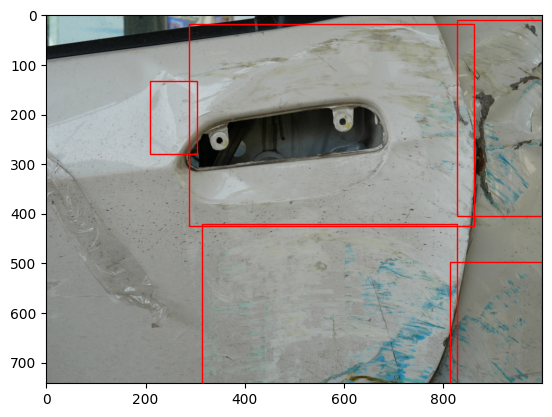

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
img_path = "/home/damian/Desktop/Projects/Bachelor/ml-carbucks/data/demo/train2017/002236.jpg"


bbs = [
    [
                209.38000000000002,
                131.58961899999997,
                94.68,
                148.350286
            ],[
                828.6899999999999,
                8.570100000000004,
                171.31,
                394.990344
            ],[
                288.07,
                17.879974000000026,
                573.13,
                406.310296
            ],[
                314.67999999999995,
                420.090349,
                512.75,
                321.91002199999997
            ],[
                814.12,
                497.60004,
                185.88,
                244.39996
            ]

]
img = plt.imread(img_path)
plt.imshow(img)
for bb in bbs:
    plt.gca().add_patch(Rectangle((bb[0], bb[1]), bb[2], bb[3], fill=False, color='red'))
plt.show()

In [ ]:
# CORRECTED ORIGINAL CODE: Fixed both image size and labeler issues
model_name = "tf_efficientdet_d4"

from pathlib import Path
from typing import Union
from effdet.config import get_efficientdet_config
from effdet.bench import DetBenchTrain, DetBenchPredict

DATA_DIR = Path("/home/bachelor/ml-carbucks/data")
config = get_efficientdet_config(model_name)

config.num_classes = 2

BATCH_SIZE = 1
# 🔧 FIX 1: Use model's expected image size instead of hardcoded 320
IMG_SIZE = config.image_size[0]  # This will be 640 for tf_efficientdet_d1

from effdet import EfficientDet
model = EfficientDet(config, pretrained_backbone=True)
model.reset_head(num_classes=config.num_classes)

# 🔧 FIX 2: Set create_labeler=True to auto-create the anchor labeler
bench = DetBenchTrain(model, create_labeler=True).cuda()
bench_config = bench.config

# Note: We don't need manual AnchorLabeler anymore since create_labeler=True
# from effdet.anchors import Anchors, AnchorLabeler
# labeler = AnchorLabeler(...)

from effdet import create_loader, create_dataset, create_evaluator
from effdet.anchors import Anchors, AnchorLabeler
from effdet.data.dataset_config import Coco2017Cfg
from effdet.data.parsers import CocoParserCfg, create_parser
from effdet.data.dataset import DetectionDatset
from collections import OrderedDict

# Allow limiting the number of images returned by the dataset
# `limit` takes an int: -1 means no limit, otherwise return up to `limit` examples
# `limit_mode`: 'first' -> take first N images, 'random' -> sample N images randomly
# `seed`: optional seed for reproducible random sampling

# Instead of torch.utils.data.Subset, create a dataset-like wrapper that
# preserves the original dataset type and API while only exposing the
# selected indices. This avoids type differences for downstream code.
class FilteredDataset:
    def __init__(self, base_dataset, indices):
        self.base_dataset = base_dataset
        self.indices = list(indices)

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        actual_idx = self.indices[idx]
        return self.base_dataset[actual_idx]

    # delegate attribute access for attributes not found on this wrapper
    def __getattr__(self, name):
        return getattr(self.base_dataset, name)

    # Explicitly expose parser and transform properties with setter delegation
    @property
    def parser(self):
        return self.base_dataset.parser

    @property
    def transform(self):
        return self.base_dataset.transform

    @transform.setter
    def transform(self, t):
        # When create_loader sets dataset.transform = ..., delegate to base dataset
        self.base_dataset.transform = t


def create_dataset_custom(
    name: str,
    img_dir: Union[str, Path],
    ann_file: Union[str, Path],
    limit: int = -1,
    limit_mode: str = "first",
    seed: int | None = None,
):

    datasets = OrderedDict()
    dataset_cfg = Coco2017Cfg()
    parser = CocoParserCfg(
        ann_filename=str(ann_file)
    )
    dataset_cls = DetectionDatset
    dataset = dataset_cls(
        data_dir=img_dir,
        parser=create_parser(dataset_cfg.parser, cfg=parser),
    )

    # If limit is set and positive, create a FilteredDataset so the loader
    # only iterates over up to `limit` items. This limits images inside the dataset.
    if limit is not None and int(limit) > 0:
        n = min(int(limit), len(dataset))
        if limit_mode == "random":
            import random
            rng = random.Random(seed)
            indices = rng.sample(range(len(dataset)), n)
        else:
            # default 'first' behaviour
            indices = list(range(n))
        dataset = FilteredDataset(dataset, indices)

    datasets[name] = dataset
    datasets = list(datasets.values())
    return datasets if len(datasets) > 1 else datasets[0]

train_dataset = create_dataset_custom(
    name="train",
    ann_file=DATA_DIR / "demo"/"annotations"/"instances_train2017.json",
    img_dir=DATA_DIR / "demo"/"train2017",
    limit=1,
    limit_mode="first",
)

train_loader = create_loader(
    dataset=train_dataset,
    input_size=IMG_SIZE,  # Now uses correct size (640)
    batch_size=BATCH_SIZE,
    is_training=False,
)
it = iter(train_loader)
batch = next(it)

import torch
optimizer = torch.optim.AdamW(bench.parameters(), lr=3e-3)
EPOCHS = 300
bench.train()
for epoch in range(EPOCHS):
    inputs, targets = batch
    output = bench(inputs, targets)  # ✅ This will now work!
    loss = output['loss']
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}, cls_loss: {output['class_loss'].item():.4f}, box_loss: {output['box_loss'].item():.4f}")

# batch[0].shape, batch[1].keys(), batch[1]['img_scale'], batch[1]['bbox'][0][:4]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Epoch 1/300, Loss: 3.5266, cls_loss: 0.5353, box_loss: 0.0598
Epoch 1/300, Loss: 3.5266, cls_loss: 0.5353, box_loss: 0.0598
Epoch 2/300, Loss: 2.8567, cls_loss: 0.4561, box_loss: 0.0480
Epoch 3/300, Loss: 2.1824, cls_loss: 0.3988, box_loss: 0.0357
Epoch 2/300, Loss: 2.8567, cls_loss: 0.4561, box_loss: 0.0480
Epoch 3/300, Loss: 2.1824, cls_loss: 0.3988, box_loss: 0.0357
Epoch 4/300, Loss: 1.6679, cls_loss: 0.3631, box_loss: 0.0261
Epoch 4/300, Loss: 1.6679, cls_loss: 0.3631, box_loss: 0.0261
Epoch 5/300, Loss: 1.4493, cls_loss: 0.3461, box_loss: 0.0221
Epoch 6/300, Loss: 1.1925, cls_loss: 0.3342, box_loss: 0.0172
Epoch 5/300, Loss: 1.4493, cls_loss: 0.3461, box_loss: 0.0221
Epoch 6/300, Loss: 1.1925, cls_loss: 0.3342, box_loss: 0.0172
Epoch 7/300, Loss: 0.9903, cls_loss: 0.3246, box_loss: 0.0133
Epoch 8/300, Loss: 0.9003, cls_loss: 0.3163, box_loss: 0.0117
Epoch 7/300, Loss: 0.9903, cls_loss: 0.3246, box_

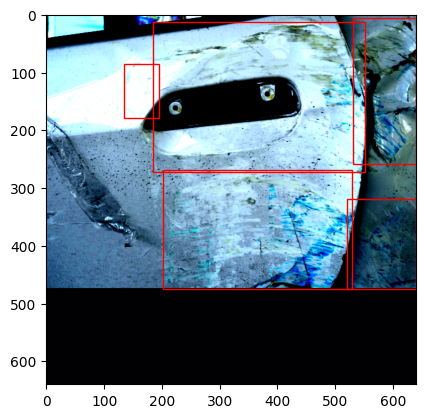

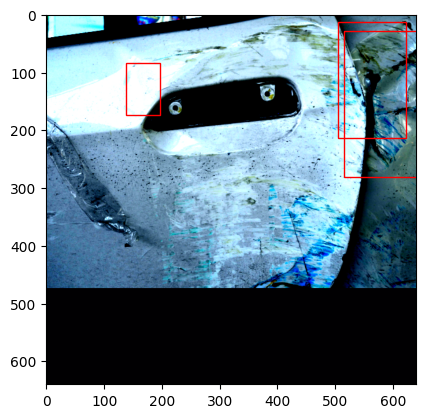

In [20]:
ppp(batch[0][0], batch[1]['bbox'][0][:, :4])
model.eval()
bench_pred = DetBenchPredict(bench.model).cuda()
bench_pred.eval()

with torch.no_grad():
    outputs = bench_pred(inputs.cuda()).cpu()

boxes = outputs[:, :, :4][:, :, [1, 0, 3, 2]]
scores = outputs[:, :, 4]
labels = outputs[:, :, 5].int()

THRESHOLD = 0.1

for i in range(boxes.shape[0]):
    mask = scores[i, :] > THRESHOLD
    boxes_i = boxes[i, :][mask]
    scores_i = scores[i, :][mask]
    labels_i = labels[i, :][mask]

    ppp(batch[0][i], boxes_i)

